In [166]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy import odr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
lcTemp = 0.1 #C
lcVoltage = 0.001 #V
lcResistance = 0 #ohms


lcFrequency = 0.001 #Khz
lcSignalVoltage = 0.001 #V


In [168]:
zeroErrorCeramic = 0.008 #V
zeroErrorPolymer = 0.015


signalFrequenecy = ufloat(1.000, lcFrequency )*1000
resistance = ufloat(1000, 10)

In [ ]:
# print('Reading file...')
# df = pd.read_excel("data.xlsx")
# print('File read successfully\n\n')

Reading file...
File read successfully




In [170]:
tempData = df['temp']

VcCeramic = df['Vc.C']
VrCeramic = df['Vr.C']

VcPolymer = df['Vc.P']
VrPolymer = df['Vr.P']


In [171]:
tempData = unumpy.uarray((tempData), lcTemp)

VcCeramic = unumpy.uarray(VcCeramic, lcVoltage)/1000-zeroErrorCeramic
VrCeramic = unumpy.uarray(VrCeramic, lcVoltage)/1000-zeroErrorCeramic
VcPolymer = unumpy.uarray(VcPolymer, lcVoltage)/1000-zeroErrorPolymer
VrPolymer = unumpy.uarray(VrPolymer, lcVoltage)/1000-zeroErrorPolymer


In [172]:
ZCeramic = VcCeramic/VrCeramic*resistance
ZPolymer = VcPolymer/VrPolymer*resistance

CCeramic = 1/(2*np.pi*signalFrequenecy*resistance*(VcCeramic/VrCeramic))*1e6
CPolymer = 1/(2*np.pi*signalFrequenecy*resistance*(VcPolymer/VrPolymer))*1e6


In [173]:

myData = odr.RealData(unumpy.nominal_values(tempData), unumpy.nominal_values(1/CCeramic), sx = unumpy.std_devs(tempData), sy = unumpy.std_devs(1/CCeramic))
myodr = odr.ODR(myData, odr.unilinear)
myoutput = myodr.run()
slope, intercept = [ufloat(beta, sd) for beta, sd in zip(myoutput.beta, myoutput.sd_beta)]

curies_temp = -1*intercept/slope



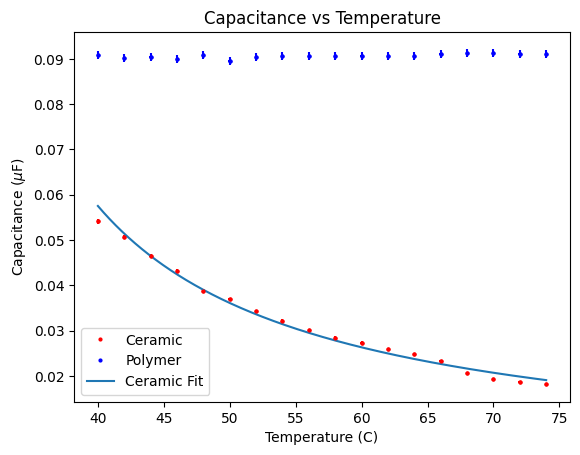

In [174]:
xSamples = np.linspace(tempData[0].n, tempData[-1].n, 1000)
capacitance = 1/(slope.n*xSamples+intercept.n)


plt.plot(unumpy.nominal_values(tempData), unumpy.nominal_values(CCeramic), 'ro', label='Ceramic',  markersize='2')
plt.xlabel('Temperature (C)')
plt.ylabel(r'Capacitance ($\mu$F)')
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(CCeramic), yerr=unumpy.std_devs(CCeramic),xerr=unumpy.std_devs(tempData) ,fmt='ro', markersize='2')
plt.plot(unumpy.nominal_values(tempData), unumpy.nominal_values(CPolymer), 'bo', label='Polymer',  markersize='2')
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(CPolymer), yerr=unumpy.std_devs(CPolymer),xerr=unumpy.std_devs(tempData) ,fmt='bo', markersize='2') 
plt.plot(xSamples, capacitance, label='Ceramic Fit')
plt.legend()


plt.title('Capacitance vs Temperature')
plt.show()


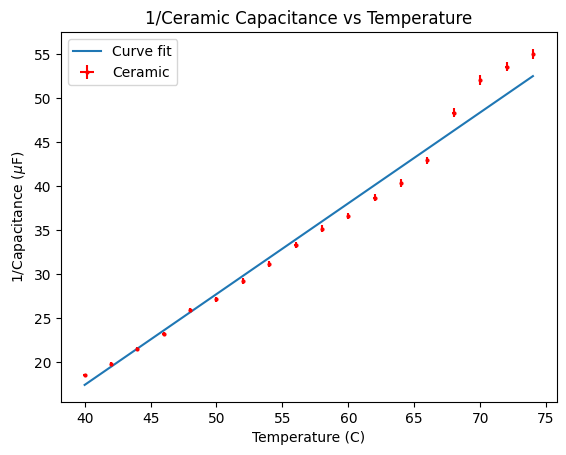

In [175]:
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(1/CCeramic), yerr=unumpy.std_devs(1/CCeramic),xerr=unumpy.std_devs(tempData) ,fmt='ro', label='Ceramic', markersize='2')
plt.xlabel('Temperature (C)')
plt.ylabel(r'1/Capacitance ($\mu$F)')
plt.plot(xSamples, slope.n*xSamples + intercept.n, label='Curve fit')
plt.legend()
plt.title('1/Ceramic Capacitance vs Temperature')
plt.show()

In [176]:
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Curie's Temp: {curies_temp} degree Celcius")

prettyPrint = pd.DataFrame(
    {
    "Temperature": tempData,
    "Ceramic Vc(V)": VcCeramic,
    "Ceramic Vr(V)": VrCeramic,
    "Z Ceramic": ZCeramic,
    "Ceramic Capacitance(uF)": CCeramic,
    "Polymer Vc(V)": VcPolymer,
    "Polymer Vr(V)": VrPolymer,
    "Z Polymer": ZPolymer,
    "Polymer Capacitance(uF)": CPolymer
    }
)

print(prettyPrint)

prettyPrint.to_csv('output.csv')
print('Output saved to output.csv')

Slope: 1.032+/-0.030, Intercept: -23.9+/-1.6
Curie's Temp: 23.2+/-1.7 degree Celcius
     Temperature          Ceramic Vc(V)          Ceramic Vr(V)  \
0   40.00+/-0.10  0.3030000+/-0.0000010  0.1030000+/-0.0000010   
1   42.00+/-0.10  0.3050000+/-0.0000010  0.0970000+/-0.0000010   
2   44.00+/-0.10  0.3080000+/-0.0000010  0.0900000+/-0.0000010   
3   46.00+/-0.10  0.3100000+/-0.0000010  0.0840000+/-0.0000010   
4   48.00+/-0.10  0.3130000+/-0.0000010  0.0760000+/-0.0000010   
5   50.00+/-0.10  0.3150000+/-0.0000010  0.0730000+/-0.0000010   
6   52.00+/-0.10  0.3160000+/-0.0000010  0.0680000+/-0.0000010   
7   54.00+/-0.10  0.3170000+/-0.0000010  0.0640000+/-0.0000010   
8   56.00+/-0.10  0.3180000+/-0.0000010  0.0600000+/-0.0000010   
9   58.00+/-0.10  0.3190000+/-0.0000010  0.0570000+/-0.0000010   
10  60.00+/-0.10  0.3200000+/-0.0000010  0.0550000+/-0.0000010   
11  62.00+/-0.10  0.3200000+/-0.0000010  0.0520000+/-0.0000010   
12  64.00+/-0.10  0.3210000+/-0.0000010  0.0500000+/-0.00